In [86]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [115]:
# loading raw dataset
df = pd.read_csv("../data/raw/telecom_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [117]:
df["CustomerID"].duplicated().sum()

np.int64(0)

In [118]:
# inspecting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [119]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [91]:
# customer who did not suscribe phone or internet services will have '0' avg monthly call or data charges
df["Avg Monthly Long Distance Charges"] = df["Avg Monthly Long Distance Charges"].fillna(0)
df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(0)

In [92]:
# customer who have not churned or  just joined (active) will have neither churn category or reason,
# their coresponding missing values are filled with "Not churned"
churn_column_fillna = ["Churn Category", "Churn Reason"]
df[churn_column_fillna] = df[churn_column_fillna].fillna("Not churned")

# all other categorical data with missing values are filled with "Unknown", as their status cannot be determined
column_fillna = ["Offer", "Multiple Lines", "Internet Type", "Online Security", "Online Backup",
                 "Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies",
                "Streaming Music", "Unlimited Data"]
df[column_fillna] = df[column_fillna].fillna("Unknown")

In [93]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [94]:
# validating logical consistency
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"Negative values found in {col}")

Negative values found in Longitude
Negative values found in Monthly Charge


In [95]:
# dropping rows where monthly charge = 0
df = df[df["Monthly Charge"] > 0]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.0,0,381.51,974.81,Stayed,Not churned,Not churned
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.4,571.45,0.0,0,150.93,722.38,Stayed,Not churned,Not churned


In [104]:
df["calculated_total"] = df["Monthly Charge"] * df["Tenure in Months"]

df["revenue_difference"] = abs(df["Total Charges"] - df["calculated_total"])

df["revenue_difference"].describe()

count    6801.000000
mean       43.931075
std        48.463049
min         0.000000
25%         9.150000
50%        28.000000
75%        62.100000
max       373.250000
Name: revenue_difference, dtype: float64

In [106]:
df[df["revenue_difference"] > 5].head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Total_Internet_Services,calculated_total,revenue_difference
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,2,295.6,14.75
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,5,1274.0,36.15
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,3,251.7,15.70
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,0.0,0,150.93,722.38,Stayed,Not churned,Not churned,5,624.6,53.15
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,0.0,0,707.16,8611.41,Stayed,Not churned,Not churned,8,7788.7,115.55


In [108]:
df.groupby("Contract")["Tenure in Months"].describe()

,count,mean,std,min,25%,50%,75%,max
Contract,,,,,,,,
Month-to-Month,3542.0,17.294466,17.210295,1.0,3.0,11.0,27.0,72.0
One Year,1503.0,41.102462,19.135550,1.0,26.0,43.0,57.0,72.0
Two Year,1756.0,52.906606,20.426628,1.0,41.0,61.0,70.0,72.0


In [110]:
df[
    (df["Phone Service"] == "No") &
    (df["Multiple Lines"] == "Yes")
]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Total_Internet_Services,calculated_total,revenue_difference


In [114]:
df.groupby("Customer Status")["Tenure in Months"].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1825.0,17.720000,19.163252,1.0,2.0,10.0,29.0,72.0
Joined,448.0,1.720982,0.819400,1.0,1.0,1.0,2.0,3.0
Stayed,4528.0,40.377208,22.136401,4.0,20.0,41.0,61.0,72.0


In [97]:
# checking for ouliers in "Total Revenue"
num_cols = df[["Total Revenue"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

Total Revenue    21
dtype: int64

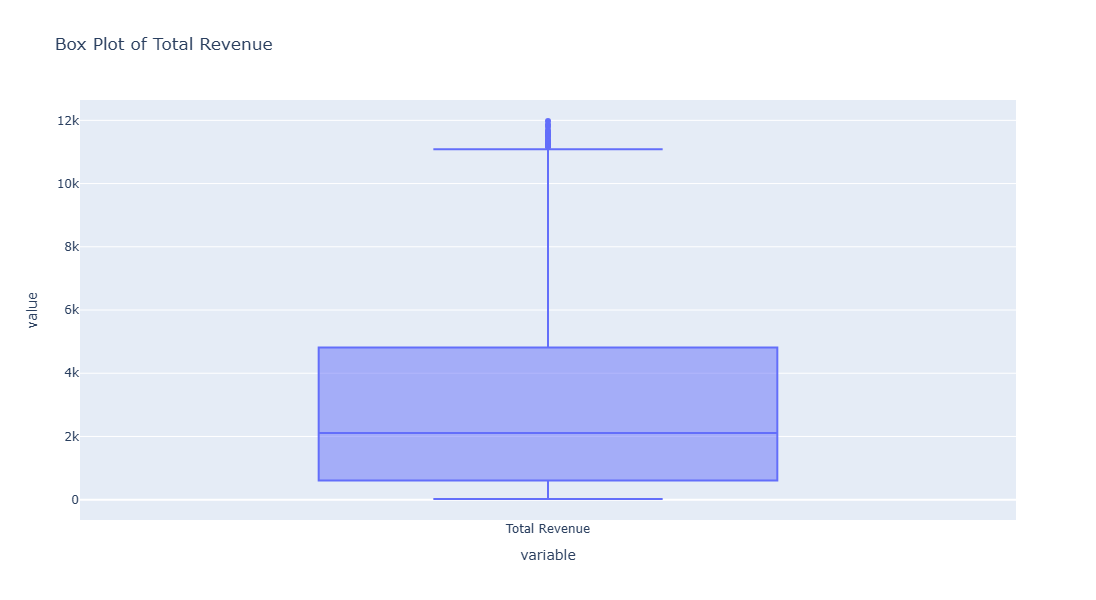

In [98]:
# using boxplot to visualize oulier for the "Total Revenue" feature
fig = px.box(
    df,
    y=["Total Revenue"],
    title="Box Plot of Total Revenue ",
    width=600,
    height=600
    # yaxis_title= "Numerical Features",
    # vert=False
)
fig.show()

In [99]:
# since all of the ouliers are above the 10_000, Total Revenue above the 10_000 is filterd and the rows are dropped
df = df[df["Total Revenue"] <= 10_000]

# outlier check
num_cols = df[["Total Revenue"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

Total Revenue    0
dtype: int64

In [100]:
# dropping customer who has joined in customer status
df_joined = df[df["Customer Status"] == "Joined"]
df_joined.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
17,0021-IKXGC,Female,72,No,0,San Marcos,92078,33.119028,-117.166036,0,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,Not churned,Not churned
23,0030-FNXPP,Female,22,No,0,Keeler,93530,36.560498,-117.962461,0,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,Not churned,Not churned
48,0082-LDZUE,Male,54,No,0,Calistoga,94515,38.629618,-122.593216,0,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,Not churned,Not churned
88,0139-IVFJG,Female,19,Yes,0,Temecula,92592,33.507255,-117.029473,10,...,Bank Withdrawal,90.35,190.5,0.0,0,9.30,199.80,Joined,Not churned,Not churned
100,0178-CIIKR,Female,60,No,0,Crows Landing,95313,37.435664,-121.049056,0,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,Not churned,Not churned


In [101]:
# Count Number of Services
service_cols = [
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Unlimited Data"
]

df["Total_Internet_Services"] = df[service_cols].apply(lambda x: (x=="Yes").sum(), axis=1)

In [102]:
df.to_csv("../data/cleaned/cleaned_telecom_customer_churn.csv", index=False)